<a href="https://colab.research.google.com/github/bhaveshasasik/nfl_game_predictor/blob/main/Most_Impactful_Running_Back.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the 2023 data file
file_path = '2023 rushing stats.csv'  # Update this path as needed
data = pd.read_csv(file_path, header=1)

# Rename columns for easier access
data.columns = [
    'Rk', 'Player', 'Tm', 'Age', 'Pos', 'G', 'GS', 'Att', 'Yds', 'TD',
    '1D', 'Succ%', 'Lng', 'Y/A', 'Y/G', 'Fmb'
]

# Ensure the dataset is filtered to include only running backs
data = data[data['Pos'] == 'RB']

# Calculate impact metrics: yards per attempt and touchdowns per attempt
data['yards_per_attempt'] = data['Yds'] / data['Att']
data['touchdowns_per_attempt'] = data['TD'] / data['Att']

# Set a minimum attempts threshold and filter players with very low attempts
min_attempts = 50
filtered_data = data[data['Att'] >= min_attempts]

# Determine the top player for each team based on impact metrics
top_players_per_team = filtered_data.sort_values(
    by=['Tm', 'yards_per_attempt', 'touchdowns_per_attempt'],
    ascending=[True, False, False]
).groupby('Tm').head(1)

print("Top Running Backs by Team based on Impact Metrics:")
print(top_players_per_team[['Tm', 'Player', 'Att', 'yards_per_attempt', 'touchdowns_per_attempt']])

# Determine the optimal minimum attempt threshold
# Plot yards per attempt vs attempts to identify stability
plt.figure(figsize=(10, 6))
plt.scatter(data['Att'], data['yards_per_attempt'], alpha=0.7)
plt.axvline(min_attempts, color='red', linestyle='--', label=f'Initial Min Attempts: {min_attempts}')
plt.xlabel("Rushing Attempts")
plt.ylabel("Yards per Attempt")
plt.title("Yards per Attempt vs. Rushing Attempts (2023)")
plt.legend()
plt.show()

# Calculate moving average to find the stabilization point in yards per attempt
data_sorted = data.sort_values(by='Att')
data_sorted['yards_per_attempt_moving_avg'] = data_sorted['yards_per_attempt'].rolling(window=5, min_periods=1).mean()

# Find where the moving average stabilizes (low variance)
variance_threshold = 0.05  # Define a variance threshold for stability
stabilizing_threshold = None

for i in range(len(data_sorted) - 5):
    variance = np.var(data_sorted['yards_per_attempt_moving_avg'][i:i+5])
    if variance < variance_threshold:
        stabilizing_threshold = data_sorted['Att'].iloc[i]
        break

print(f"Suggested minimum attempts for determining impact based on stabilization: {stabilizing_threshold}")


FileNotFoundError: [Errno 2] No such file or directory: '2023 rushing stats.csv'

Suggested minimum attempts per game for impactful running backs: 6.82


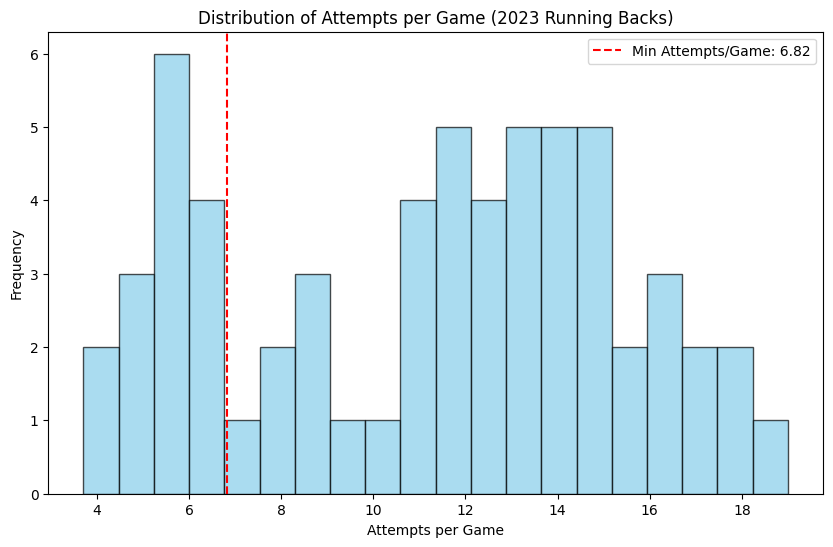

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data (ensure correct file path)
file_path = '2023 rushing stats.csv'  # Update as needed
data = pd.read_csv(file_path, header=1)

# Rename columns
data.columns = [
    'Rk', 'Player', 'Tm', 'Age', 'Pos', 'G', 'GS', 'Att', 'Yds', 'TD',
    '1D', 'Succ%', 'Lng', 'Y/A', 'Y/G', 'Fmb'
]

# Filter to include only running backs and remove players with very few total attempts
data = data[(data['Pos'] == 'RB') & (data['Att'] >= 60)]  # You can adjust the minimum attempts

# Calculate attempts per game
data['Att_per_game'] = data['Att'] / data['G']

# Determine the minimum attempts per game by analyzing percentiles among impactful players
min_attempts_per_game_threshold = np.percentile(data['Att_per_game'], 25)  # Adjust percentile as needed

print(f"Suggested minimum attempts per game for impactful running backs: {min_attempts_per_game_threshold:.2f}")

# Plot attempts per game distribution
plt.figure(figsize=(10, 6))
plt.hist(data['Att_per_game'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(min_attempts_per_game_threshold, color='red', linestyle='--', label=f'Min Attempts/Game: {min_attempts_per_game_threshold:.2f}')
plt.xlabel("Attempts per Game")
plt.ylabel("Frequency")
plt.title("Distribution of Attempts per Game (2023 Running Backs)")
plt.legend()
plt.show()


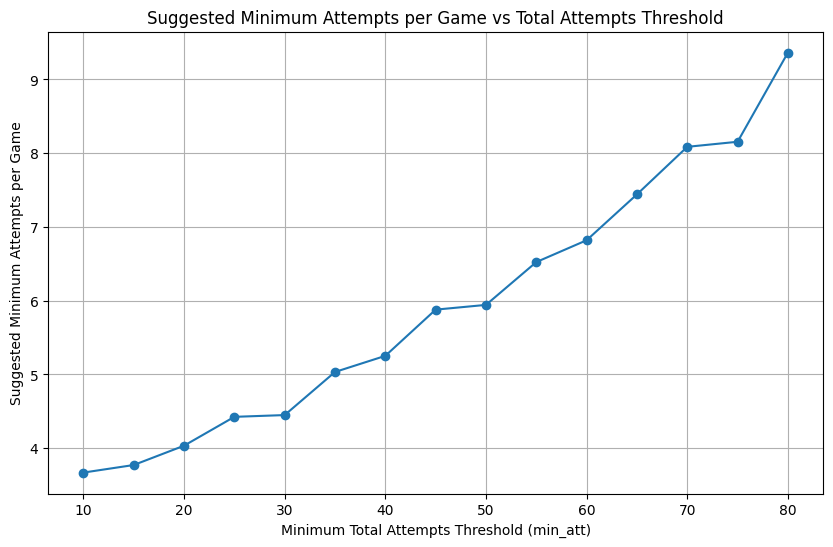

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data (ensure correct file path)
file_path = '2023 rushing stats.csv'  # Update as needed
data = pd.read_csv(file_path, header=1)

# Rename columns
data.columns = [
    'Rk', 'Player', 'Tm', 'Age', 'Pos', 'G', 'GS', 'Att', 'Yds', 'TD',
    '1D', 'Succ%', 'Lng', 'Y/A', 'Y/G', 'Fmb'
]

# Filter to only include running backs
data = data[data['Pos'] == 'RB']

# Dictionary to store min attempts per game for each min_att threshold
min_attempts_per_game_dict = {}

# Iterate over min attempt thresholds from 10 to 80
for min_att in range(10, 81, 5):  # Step by 5 for clarity
    # Filter data based on the current min_att threshold and make a copy to avoid warnings
    filtered_data = data[data['Att'] >= min_att].copy()

    # Calculate attempts per game for filtered data
    filtered_data['Att_per_game'] = filtered_data['Att'] / filtered_data['G']

    # Calculate the 25th percentile of Att_per_game as the suggested min attempts per game
    if not filtered_data['Att_per_game'].empty:  # Check if there's data left after filtering
        suggested_min_att_per_game = np.percentile(filtered_data['Att_per_game'], 25)
        min_attempts_per_game_dict[min_att] = suggested_min_att_per_game

# Convert results to lists for plotting
min_att_values = list(min_attempts_per_game_dict.keys())
suggested_min_att_per_game_values = list(min_attempts_per_game_dict.values())

# Plot the suggested min attempts per game vs min_att
plt.figure(figsize=(10, 6))
plt.plot(min_att_values, suggested_min_att_per_game_values, marker='o', linestyle='-')
plt.xlabel("Minimum Total Attempts Threshold (min_att)")
plt.ylabel("Suggested Minimum Attempts per Game")
plt.title("Suggested Minimum Attempts per Game vs Total Attempts Threshold")
plt.grid(True)
plt.show()


In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import os

print("Current working directory:", os.getcwd())
# Load the 2023 data (ensure correct file path)
file_path = '2023 rushing stats.csv'  # Update this path as needed
data = pd.read_csv(file_path, header=1)

# Rename columns for easy access
data.columns = [
    'Rk', 'Player', 'Tm', 'Age', 'Pos', 'G', 'GS', 'Att', 'Yds', 'TD',
    '1D', 'Succ%', 'Lng', 'Y/A', 'Y/G', 'Fmb'
]

# Filter to only include running backs and apply a minimum attempts threshold
data = data[(data['Pos'] == 'RB') & (data['Att'] >= 60)]

# Calculate additional impact metrics
data['Yards_per_Attempt'] = data['Yds'] / data['Att']
data['Touchdowns_per_Attempt'] = data['TD'] / data['Att']
data['Success_Rate'] = data['Succ%'] / 100  # Assuming Succ% is already a percentage

# Select the metrics for impact scoring
metrics = ['Yards_per_Attempt', 'Touchdowns_per_Attempt', 'Success_Rate', 'Y/G']

# Normalize the metrics to bring them to a 0-1 range
scaler = MinMaxScaler()
data[metrics] = scaler.fit_transform(data[metrics])

# Calculate the final impact score as a weighted sum of metrics
data['Impact_Score'] = (
    0.4 * data['Yards_per_Attempt'] +
    0.3 * data['Touchdowns_per_Attempt'] +
    0.2 * data['Success_Rate'] +
    0.1 * data['Y/G']
)

# Sort and group by team to get the top player per team based on Impact Score
top_players_per_team = (
    data.sort_values(by=['Tm', 'Impact_Score'], ascending=[True, False])
    .groupby('Tm')
    .head(1)
)

# Display the top impactful running back for each team
print("Top Impactful Running Back per Team in 2023 based on Combined Impact Score:")
print(top_players_per_team[['Tm', 'Player', 'Att', 'Impact_Score', 'Yards_per_Attempt', 'Touchdowns_per_Attempt', 'Success_Rate', 'Y/G']])


Current working directory: /content


FileNotFoundError: [Errno 2] No such file or directory: '2023 rushing stats.csv'

CODE TO COMBINE RB DATA + OTHERS INTO RANDOM FOREST

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

# Function to find most impactful running back
def calculate_top_rb_impact(file_path):
    # Load data
    data = pd.read_csv(file_path, header=1)

    # Rename columns for easy access
    data.columns = [
        'Rk', 'Player', 'Tm', 'Age', 'Pos', 'G', 'GS', 'Att', 'Yds', 'TD',
        '1D', 'Succ%', 'Lng', 'Y/A', 'Y/G', 'Fmb'
    ]

    # Filter for running backs with minimum attempts
    data = data[(data['Pos'] == 'RB') & (data['Att'] >= 60)]

    # Calculate additional metrics
    data['Yards_per_Attempt'] = data['Yds'] / data['Att']
    data['Touchdowns_per_Attempt'] = data['TD'] / data['Att']
    data['Success_Rate'] = data['Succ%'] / 100  # Assuming Succ% is already a percentage

    # Select metrics and normalize
    metrics = ['Yards_per_Attempt', 'Touchdowns_per_Attempt', 'Success_Rate', 'Y/G']
    scaler = MinMaxScaler()
    data[metrics] = scaler.fit_transform(data[metrics])

    # Calculate impact score
    data['Impact_Score'] = (
        0.4 * data['Yards_per_Attempt'] +
        0.3 * data['Touchdowns_per_Attempt'] +
        0.2 * data['Success_Rate'] +
        0.1 * data['Y/G']
    )

    # Get top player per team
    top_players_per_team = (
        data.sort_values(by=['Tm', 'Impact_Score'], ascending=[True, False])
        .groupby('Tm')
        .head(1)
    )

    # Return impactful players as tuples
    impactful_players = top_players_per_team[['Pos', 'Player', 'Impact_Score']].apply(
        lambda row: (row['Pos'], row['Player'], row['Impact_Score']), axis=1
    ).tolist()

    return impactful_players

# Function to process general team data (standings and win/loss records)
def process_team_standings(file_path):
    # Load data
    standings = pd.read_csv(file_path)

    # Calculate win percentage
    standings['Win_Percentage'] = standings['Wins'] / (standings['Wins'] + standings['Losses'])

    # Normalize win percentage
    scaler = MinMaxScaler()
    standings['Win_Percentage_Normalized'] = scaler.fit_transform(standings[['Win_Percentage']])

    # Return standings data
    team_data = standings[['Team', 'Win_Percentage_Normalized']].set_index('Team').to_dict('index')
    return team_data

# Combine impact scores and general team data
def combine_team_data(rb_impact_data, team_data):
    combined_data = []
    for team, rb_info in rb_impact_data.items():
        if team in team_data:
            combined_data.append({
                'Team': team,
                'Impact_Score': rb_info['Impact_Score'],
                'Win_Percentage': team_data[team]['Win_Percentage_Normalized']
            })
    return pd.DataFrame(combined_data)

# Random forest model
def train_random_forest(data):
    # Prepare features and labels
    X = data[['Impact_Score', 'Win_Percentage']]
    y = data['Outcome']  # Binary outcome: 1 = Win, 0 = Loss

    # Train random forest
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X, y)

    return rf

# Example Usage
if __name__ == "__main__":
    # Calculate RB impact
    rb_file_path = '2023_rushing_stats.csv'  # Path to rushing stats file
    rb_impact = calculate_top_rb_impact(rb_file_path)
    print("RB Impact:", rb_impact)

    # Process team standings
    standings_file_path = 'team_standings.csv'  # Path to standings file
    team_standings = process_team_standings(standings_file_path)
    print("Team Standings:", team_standings)

    # Combine data
    combined_data = combine_team_data(rb_impact, team_standings)
    print("Combined Data:", combined_data)

    # Train random forest (assuming Outcome column is present in combined_data)
    rf_model = train_random_forest(combined_data)
    print("Random Forest Model Trained.")
